In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_18076\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
data = df.reset_index()
data.head(1)

,index,Unnamed: 0,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month
0,0,0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,2017,Январь


In [4]:
month = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [5]:
group_by = pd.pivot_table(data, values="count",index=["year",'month','education','gender', 'hc_didnotwork', 'find_new_job','hc_repeat', 'age'], aggfunc="sum").reset_index()
group_by['month'] = pd.Categorical(group_by['month'], categories = month, ordered=True)
overall = group_by['count'].sum()

In [6]:
group_by['gender'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [7]:
group_by1 = group_by[group_by['find_new_job']==True].copy()
group_by1['%_trud'] = group_by1['count'] / overall * 100

In [8]:
gender_dictionary = {1:'Мужчины', 
                     0: 'Женщины',
                     #По совершенно не понятной мне причине - сбилась именно в этом столбце правка. 
                     #Причём в самом блокноте, где делалась правка - всё нормально. И в других столбцах тоже всё хорошо.
                     #Придётся внести дополнительно - но это какой-то баг
                     '1': 'Мужчины',
                     '0': 'Женщины',
                     'None': 'Не указан'}

group_by1['gender'] = group_by1['gender'].map(gender_dictionary)
group_by1

,year,month,education,gender,hc_didnotwork,find_new_job,hc_repeat,age,count,%_trud
14,2017,Август,0,Женщины,False,True,False,16-21,404,0.003965
15,2017,Август,0,Женщины,False,True,False,22-27,658,0.006457
16,2017,Август,0,Женщины,False,True,False,28-33,987,0.009686
17,2017,Август,0,Женщины,False,True,False,34-39,1084,0.010638
18,2017,Август,0,Женщины,False,True,False,40-45,998,0.009794
...,...,...,...,...,...,...,...,...,...,...
62197,2020,Январь,9,Мужчины,False,True,True,58-60,1,0.000010
62208,2020,Январь,9,Мужчины,True,True,False,22-27,1,0.000010
62209,2020,Январь,9,Мужчины,True,True,False,52-57,1,0.000010
62210,2020,Январь,9,Мужчины,True,True,True,22-27,1,0.000010


In [9]:
group_by1['month'] = pd.Categorical(group_by1['month'], categories = month, ordered=True)

In [39]:
group_by1

,year,month,education,gender,hc_didnotwork,find_new_job,hc_repeat,age,count,%_trud
14,2017,Август,0,Женщины,False,True,False,16-21,404,0.003965
15,2017,Август,0,Женщины,False,True,False,22-27,658,0.006457
16,2017,Август,0,Женщины,False,True,False,28-33,987,0.009686
17,2017,Август,0,Женщины,False,True,False,34-39,1084,0.010638
18,2017,Август,0,Женщины,False,True,False,40-45,998,0.009794
...,...,...,...,...,...,...,...,...,...,...
62197,2020,Январь,9,Мужчины,False,True,True,58-60,1,0.000010
62208,2020,Январь,9,Мужчины,True,True,False,22-27,1,0.000010
62209,2020,Январь,9,Мужчины,True,True,False,52-57,1,0.000010
62210,2020,Январь,9,Мужчины,True,True,True,22-27,1,0.000010


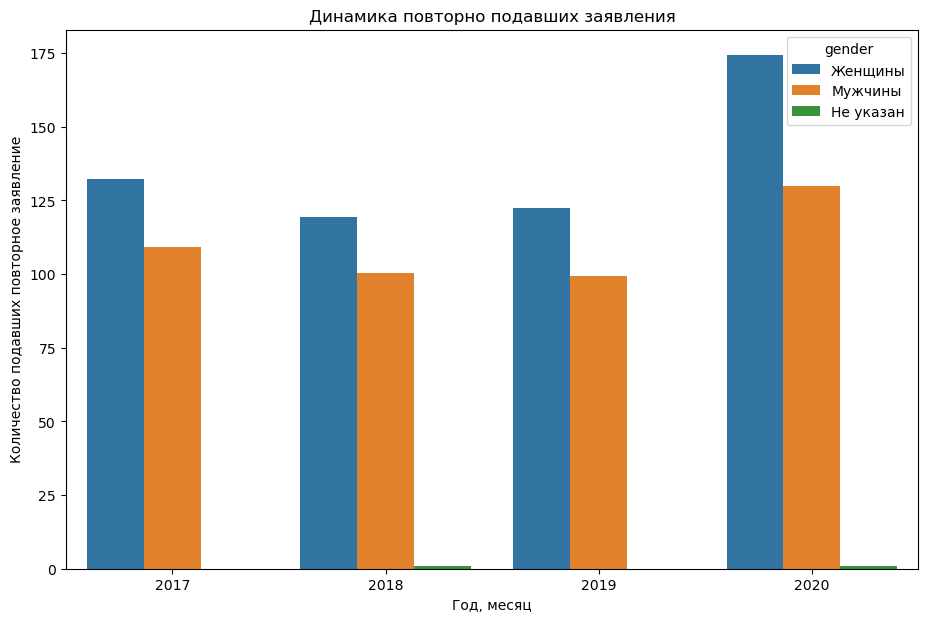

In [10]:
sns.barplot(data=group_by1,x='year',y='count',ci=False,hue='gender').set(xlabel='Год, месяц', ylabel = 'Количество подавших повторное заявление', title = 'Динамика повторно подавших заявления')
plt.savefig('Task8_1.png')

In [41]:
group_by[group_by['year']==2017]['count'].sum()

1636952